# Análise do dataset Pokémon

## Contextualização

Para esse EDA escolhi o dataset de Pokémon, por ser um grade fã da franquia.

## Obtenção de dados

Os dados utilizados nessa análise estão disponiveis no Kaggle (https://www.kaggle.com/datasets/abcsds/pokemon)
baixados em 25/06/2023.

In [1]:
# needed packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv("../dataset/Pokemon.csv")

## Análise exploratória

In [3]:
# show df head
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# show df tail
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


De acordo com a fonte dos dados, essa é a descrição de cada uma das variáveis presentes no dataset.

`#`: ID para cada Pokémon  
`Name`: Nome de cada Pokémon  
`Type 1`: Tipo primário do Pokémon  
`Type 2`: Alguns Pokémons tem um tipo secundário  
`Total`: A soma de todos atributos, quanto maior o total, mais forte é o Pokémon  
`HP`: Vida, é o que define quanto de dano ele recebe antes de desmaiar  
`Attack`: Valor de dano do ataque fisíco  
`Defense`: Valor de resistência a ataque fisíco  
`SP Atk`: Valor de dano do ataque especiais  
`SP Def`: Valor de resistência a ataque especiais  
`Speed`: A velocidade de um Pokémon determina se ele ataca ou é atacado primeiro.  
`Generation`: Indica qual a geração do Pokémon  
`Ledendary`: Indica se ele é lendário  

In [5]:
# verificando as dimensões
print('Variáveis: ', df.shape[1])
print('Entradas: ', df.shape[0])

Variáveis:  13
Entradas:  800


In [6]:
# verificando as informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


A partir da função `describe()` podemos ver a distribuição estatística das variáveis. Tiramos informações como:

`count` - Contagem de entradas válidas para cada variável  
`mean` - Média aritmética dos valores da variável  
`std` - Desvio padrão  
`min` - Menor valor existente para a variável  
`25%` - Primeiro quartil  
`50%` - Mediana  
`75%` - Terceiro quartil  
`max` - MAior valor existente para a variável  

In [7]:
# distribuição estatística das variáveis numéricas
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Passado o argumento `include='O'`, para que busca de variáveis categóricas.

`count` - Contagem de entradas válidas para a variável  
`unique` - Quantidade de entradas únicas  
`top` - Entrada mais comum  
`freq` - Frequência em que a entrada mais comum ocorre  

In [8]:
# distribuição estatística das variáveis categóricas
df.describe(include='O')

,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,Bulbasaur,Water,Flying
freq,1,112,97


As entradas mais comuns são:

`Name`: Bulbasaur  
`Type1`: Water  
`Type2`: Flying  

In [9]:
# checando a porcentagem de valores ausentes para cada variável
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Type 2        0.4825
#             0.0000
Name          0.0000
Type 1        0.0000
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

Text(0, 0.5, 'Missing values')

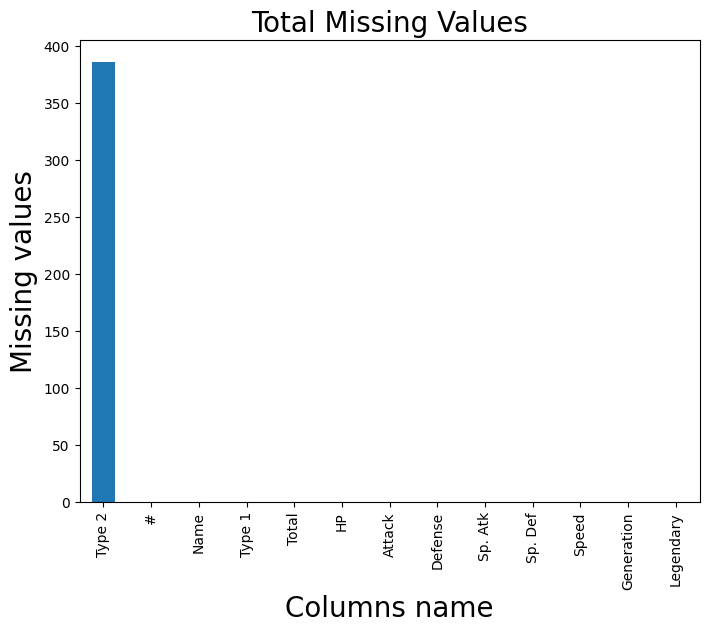

In [14]:
# plot missing values
df.isnull().sum().sort_values(ascending=False).plot(
  kind="bar",
  figsize = (8,6),
  fontsize = 10
)

plt.title("Total Missing Values", fontsize = 20)
plt.xlabel("Columns name", fontsize = 20)
plt.ylabel("Missing values", fontsize = 20)

Na verificação de valores nulos, apenas o atributo `Type2` tem valores ausentes, mas, que é explicavel já que nem todo Pokémon tem um tipo secundário.

Qual o tipo de distribuição das variáveis?

array([[<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Attack'}>],
       [<Axes: title={'center': 'Defense'}>,
        <Axes: title={'center': 'Sp. Atk'}>,
        <Axes: title={'center': 'Sp. Def'}>],
       [<Axes: title={'center': 'Speed'}>,
        <Axes: title={'center': 'Generation'}>, <Axes: >]], dtype=object)

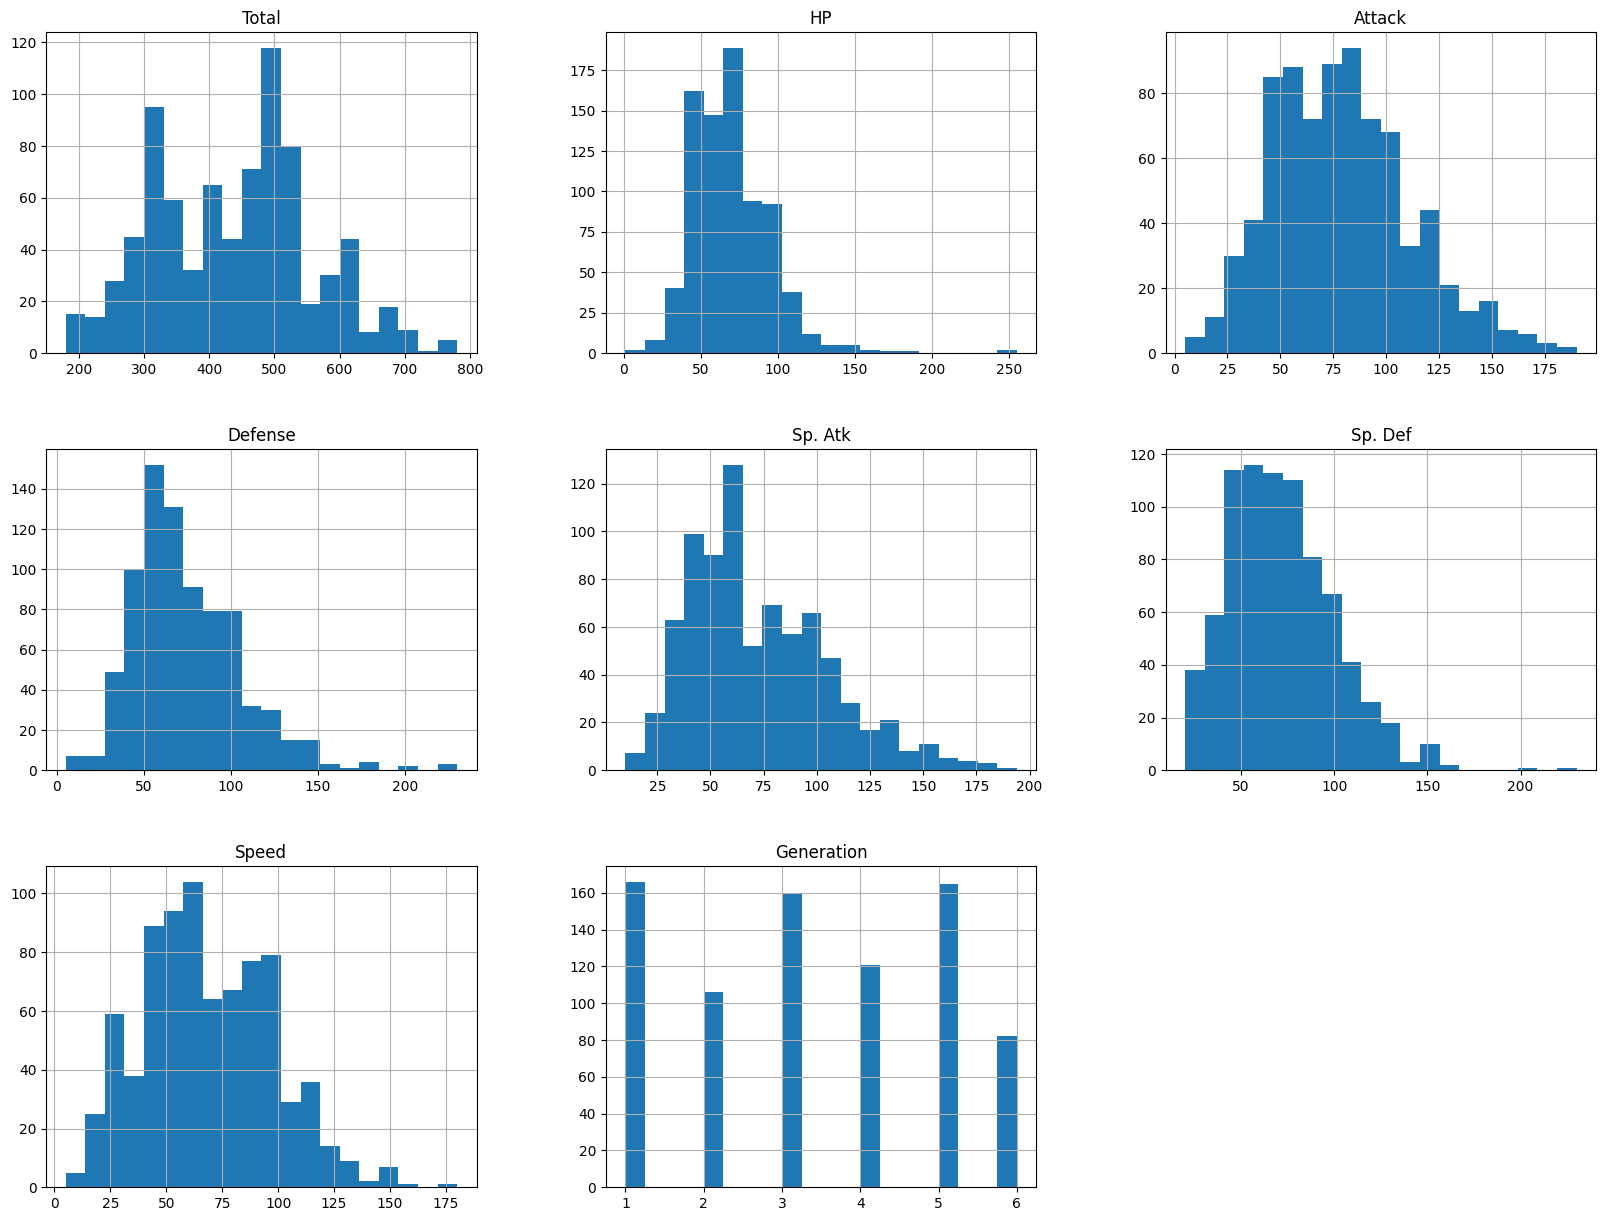

In [10]:
# excluindo o numero da pokedéx
df_hist = df.drop(["#"], axis=1)

df_hist.hist(bins=20, figsize=(20,15))

## Conclusão

O dataset está bem completo, podendo assim ir para a análise univariada